In [6]:
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns # for loading dataset

import matplotlib.pyplot as plt
import matplotlib_inline
from sklearn.model_selection import train_test_split
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [7]:
# import dataset
iris = sns.load_dataset('iris')

# convert pandas to tensor
data = torch.tensor(iris[iris.columns[0:4]].values, dtype=torch.float)

# label encoding
labels = torch.zeros(data.shape[0],dtype=torch.long)

labels[iris.species == "versicolor"] = 1
labels[iris.species == "virginica"] = 2

In [8]:
def createModel():
    # create the ANN model
    ANNiris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3),
    )
    
    lossFn = nn.CrossEntropyLoss()
    
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)
    
    return ANNiris, lossFn, optimizer

In [13]:
# train the model

#global parameter
num_epochs = 200

def trainModel(trainProp):
    # init vars
    losses = torch.zeros(num_epochs)
    trainAcc = []
    testAcc = []
    
    X_train,X_test,y_train,y_test = train_test_split(data,labels,train_size=trainProp)
        
    for epochI in range(num_epochs):
        
        
        # forward pass and loss
        yHat = ANNiris(X_train)
        loss = lossFn(yHat,y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        trainAcc.append(100*torch.mean((torch.argmax(yHat,dim=1)==y_train).float()).item())
        
        predLabels = torch.argmax(ANNiris(X_test),dim=1)
        testAcc.append(100*torch.mean((predLabels == y_test).float()).item())
        
    return trainAcc,testAcc
    

### Testin the model

In [14]:
# create a model 
ANNiris, lossFn, optimizer = createModel()

trainAcc,testAcc = trainModel(0.8)

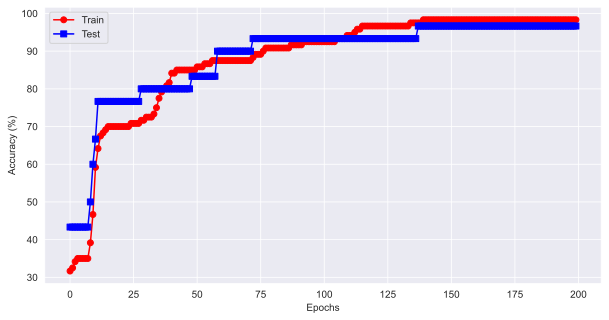

In [17]:
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])
plt.show()

### Experiment

In [21]:
trainSetSizes = np.linspace(.2,.95,10)

allTrainAcc = np.zeros((len(trainSetSizes),num_epochs))
allTestAcc = np.zeros((len(trainSetSizes),num_epochs))

for i in range(len(trainSetSizes)):
    
    ANNiris, lossFn, optimizer = createModel()
    
    trainAcc,testAcc = trainModel(trainSetSizes[i])
    
    allTrainAcc[i,:] = trainAcc
    allTestAcc[i,:] = testAcc

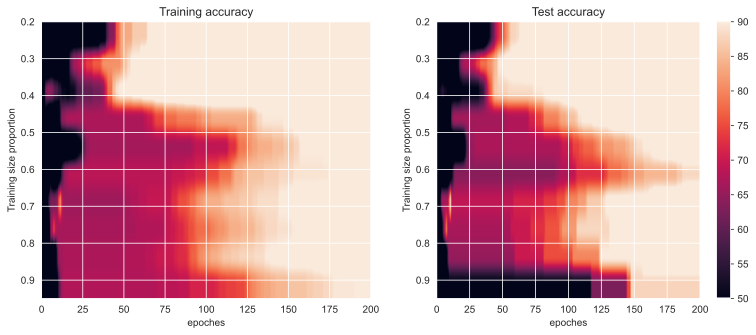

In [22]:
fig,ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(allTrainAcc,aspect='auto',vmin=50,vmax=90,extent=[0,num_epochs,trainSetSizes[-1],trainSetSizes[0]])
ax[0].set_xlabel('epoches')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title("Training accuracy")

p = ax[1].imshow(allTestAcc,aspect='auto',vmin=50,vmax=90,extent=[0,num_epochs,trainSetSizes[-1],trainSetSizes[0]])

ax[1].set_xlabel('epoches')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title("Test accuracy")
fig.colorbar(p,ax=ax[1])

plt.show()
